# Spin Echo

## 1. a)

In [131]:
import sys
# !conda install --yes --prefix {sys.prefix} numpy
# !conda install --yes --prefix {sys.prefix} qiskit
# !conda install --yes --prefix {sys.prefix} matplotlib
# !{sys.executable} -m pip install pyppeteer

     |████████████████████████████████| 83 kB 2.6 MB/s eta 0:00:011
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     |████████████████████████████████| 76 kB 10.1 MB/s eta 0:00:01


In [110]:
import numpy as np
from qiskit import *
from matplotlib import pyplot
from math import pi

In [ ]:
thetas = [i*pi/10 for i in range(0,11)]
shots = 100

In [122]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(counts_arr):

    zeros_count = [count[0] for count in counts_arr] #+ [sum([count[0] for count in counts_arr])/len(counts_arr)]
    ones_count = [count[1] for count in counts_arr] #+ [sum([count[1] for count in counts_arr])/len(counts_arr)]
    ones_pct = [count/shots for count in ones_count]

    fig, ax = plt.subplots()
    labels = [f'{i}/10*pi' for i in range(len(thetas))] #+ ['Average']
    x = np.arange(len(labels))
    width=0.35

#     c1 = ax.bar(x - width/2, zeros_count, width, label='Output = 0')
    c2 = ax.bar(x + width/2, ones_pct, width, label='Output = 1')

    ax.set_ylabel('Output 1 Average')
    ax.set_xlabel('Theta')
    ax.set_title('Output 1 Averages vs. Theta')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

#     ax.bar_label(c1, padding=3)
    ax.bar_label(c2, padding=3)

    fig.set_size_inches(12, 9)

    plt.show()

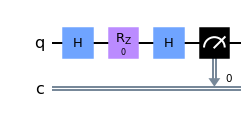

theta=0/10*pi	counts: {'0': 100}	avg: 0.0%
theta=1/10*pi	counts: {'1': 2, '0': 98}	avg: 2.0%
theta=2/10*pi	counts: {'1': 8, '0': 92}	avg: 8.0%
theta=3/10*pi	counts: {'0': 71, '1': 29}	avg: 29.0%
theta=4/10*pi	counts: {'0': 62, '1': 38}	avg: 38.0%
theta=5/10*pi	counts: {'0': 49, '1': 51}	avg: 51.0%
theta=6/10*pi	counts: {'1': 68, '0': 32}	avg: 68.0%
theta=7/10*pi	counts: {'0': 13, '1': 87}	avg: 87.0%
theta=8/10*pi	counts: {'0': 8, '1': 92}	avg: 92.0%
theta=9/10*pi	counts: {'0': 3, '1': 97}	avg: 97.0%
theta=10/10*pi	counts: {'1': 100}	avg: 100.0%


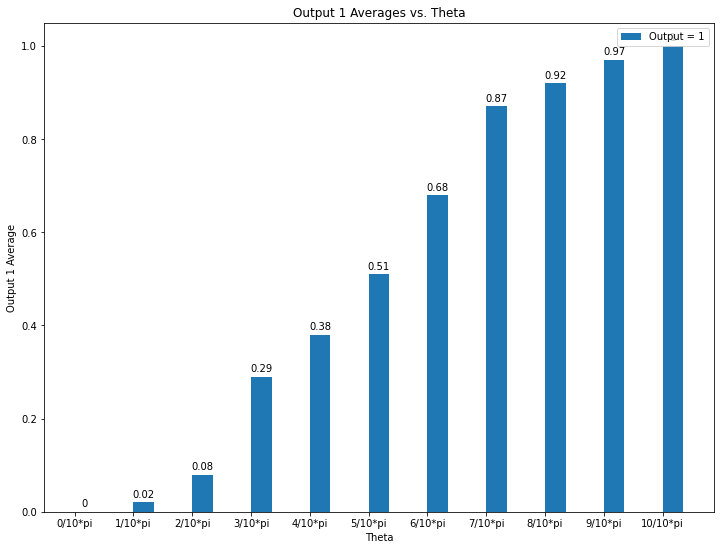

In [123]:
counts_arr = [ [] for i in range(len(thetas)) ]

for i, theta in enumerate(thetas):
    
    # Build circuit
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.rz(theta,0)
    qc.h(0)
    qc.measure(0,0)
    if i==0:
        qc.draw('mpl')
        pyplot.show()

    # Simulate circuit using Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc)
    
    # collect counts of simulation output
    counts_arr[i].append( counts['0'] if '0' in counts else 0 )
    counts_arr[i].append( counts['1'] if '1' in counts else 0 )
    
    print(f'theta={i}/10*pi\tcounts: {counts}\tavg: {counts_arr[i][1]/shots*100:.1f}%')
    
plot_results(counts_arr)

## 1. b)

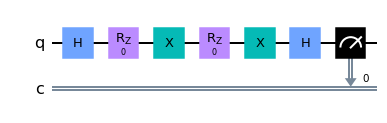

theta=0/10*pi	counts: {'0': 100}	avg: 0.00%
theta=1/10*pi	counts: {'0': 100}	avg: 0.00%
theta=2/10*pi	counts: {'0': 100}	avg: 0.00%
theta=3/10*pi	counts: {'0': 100}	avg: 0.00%
theta=4/10*pi	counts: {'0': 100}	avg: 0.00%
theta=5/10*pi	counts: {'0': 100}	avg: 0.00%
theta=6/10*pi	counts: {'0': 100}	avg: 0.00%
theta=7/10*pi	counts: {'0': 100}	avg: 0.00%
theta=8/10*pi	counts: {'0': 100}	avg: 0.00%
theta=9/10*pi	counts: {'0': 100}	avg: 0.00%
theta=10/10*pi	counts: {'0': 100}	avg: 0.00%


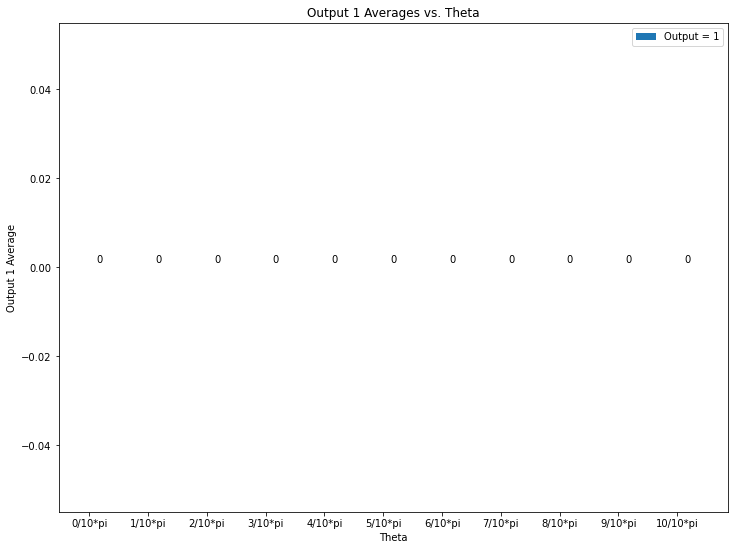

In [124]:
counts_arr = [ [] for i in range(len(thetas)) ]
for i, theta in enumerate(thetas):
    
    # Build circuit
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.rz(theta/2,0)
    qc.x(0)
    qc.rz(theta/2,0)
    qc.x(0)
    qc.h(0)
    qc.measure(0,0)
    if i==0:
        qc.draw('mpl')
        pyplot.show()

    # Simulate circuit using Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc)
    
    # collect counts of simulation output
    counts_arr[i].append( counts['0'] if '0' in counts else 0 )
    counts_arr[i].append( counts['1'] if '1' in counts else 0 )
    
    print(f'theta={i}/10*pi\tcounts: {counts}\tavg: {counts_arr[i][1]/shots:.2f}%')
    
plot_results(counts_arr)

## 1. c)


-----
Delta: 0.1


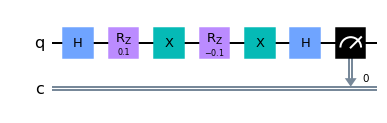

theta=0/10*pi	counts: {'0': 100}	avg: 0.00%
theta=1/10*pi	counts: {'0': 100}	avg: 0.00%
theta=2/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=3/10*pi	counts: {'1': 2, '0': 98}	avg: 0.02%
theta=4/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=5/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=6/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=7/10*pi	counts: {'0': 100}	avg: 0.00%
theta=8/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=9/10*pi	counts: {'0': 100}	avg: 0.00%
theta=10/10*pi	counts: {'0': 100}	avg: 0.00%


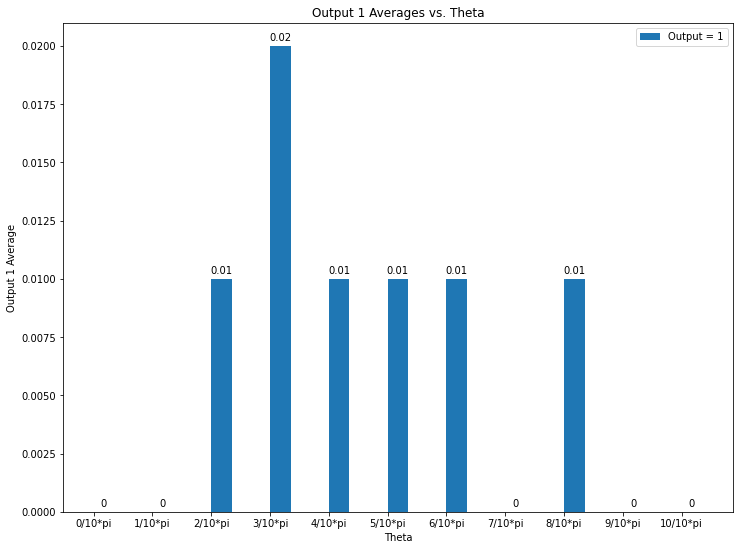


-----
Delta: 0.2


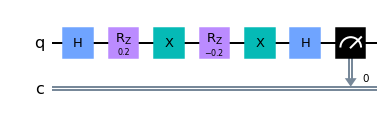

theta=0/10*pi	counts: {'1': 2, '0': 98}	avg: 0.02%
theta=1/10*pi	counts: {'1': 4, '0': 96}	avg: 0.04%
theta=2/10*pi	counts: {'1': 2, '0': 98}	avg: 0.02%
theta=3/10*pi	counts: {'1': 2, '0': 98}	avg: 0.02%
theta=4/10*pi	counts: {'1': 3, '0': 97}	avg: 0.03%
theta=5/10*pi	counts: {'1': 4, '0': 96}	avg: 0.04%
theta=6/10*pi	counts: {'1': 9, '0': 91}	avg: 0.09%
theta=7/10*pi	counts: {'1': 3, '0': 97}	avg: 0.03%
theta=8/10*pi	counts: {'1': 3, '0': 97}	avg: 0.03%
theta=9/10*pi	counts: {'1': 7, '0': 93}	avg: 0.07%
theta=10/10*pi	counts: {'1': 3, '0': 97}	avg: 0.03%


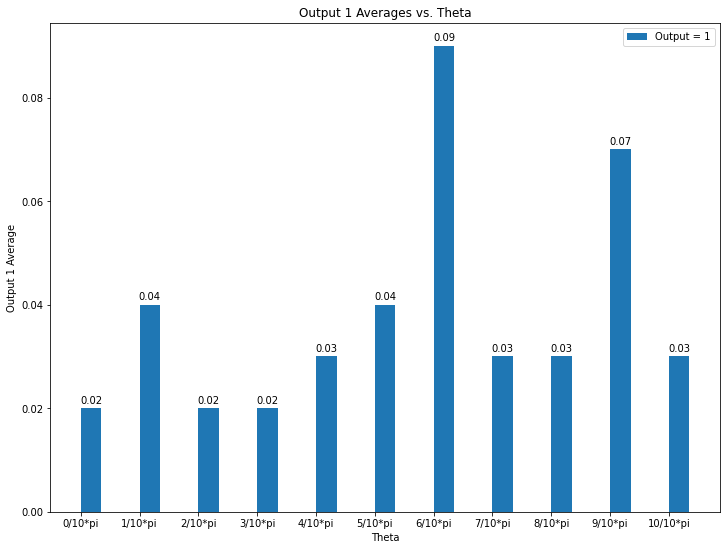

In [125]:

deltas = [0.1, 0.2]

for delta in deltas:
    counts_arr = [ [] for i in range(len(thetas)) ]
    print(f"\n-----\nDelta: {delta}")
    for i, theta in enumerate(thetas):

        # Build circuit
        qc = QuantumCircuit(1,1)
        qc.h(0)
        qc.rz(theta/2+delta,0)
        qc.x(0)
        qc.rz(theta/2-delta,0)
        qc.x(0)
        qc.h(0)
        qc.measure(0,0)
        if i==0:
            qc.draw('mpl')
            pyplot.show()

        # Simulate circuit using Aer's qasm_simulator
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = backend_sim.run(transpile(qc, backend_sim), shots=shots)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc)

        # collect counts of simulation output
        counts_arr[i].append( counts['0'] if '0' in counts else 0 )
        counts_arr[i].append( counts['1'] if '1' in counts else 0 )

        print(f'theta={i}/10*pi\tcounts: {counts}\tavg: {counts_arr[i][1]/shots:.2f}%')
    
    plot_results(counts_arr)

## 1.d)

The output of the circuit in part a starts off as entirely 0 as theta=0, and as theta increases it starts becoming a mixture of 0 and 1. Once theta passes 1/2 * pi, the output value 1 starts becoming the more likely output up until theata=pi, at which point the output is 1 with certainty. 

The circuit outputs in parts b and c don't seem to change as theta changes, with the circuit in part b having output value 0 with certainty for all values of theta. However, the circuit in part c, with delta=0.1, is measured with value 0 as well as 1 (with a small probability ~ 1%), and this increases to an output value 1 with probability ~4% as delta increases to 0.2. This indicates that the symetry of the circuit in part b which allows the state |0> to stay unchanged through the circuit is slightly marred by the addition then subtraction of the delta value from the two RZ gates, respectivley. 

## 2.a)

In [126]:
from qiskit.quantum_info import Operator
from qiskit.extensions import HamiltonianGate
from qiskit.opflow import I, X, Y, Z

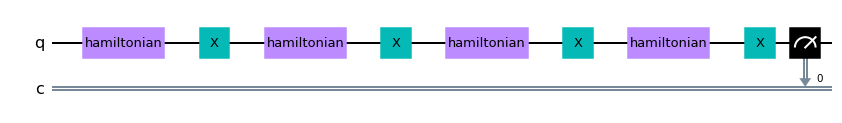

theta=0/10*pi	counts: {'0': 100}	avg: 0.00%
theta=1/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=2/10*pi	counts: {'1': 2, '0': 98}	avg: 0.02%
theta=3/10*pi	counts: {'1': 7, '0': 93}	avg: 0.07%
theta=4/10*pi	counts: {'1': 14, '0': 86}	avg: 0.14%
theta=5/10*pi	counts: {'0': 84, '1': 16}	avg: 0.16%
theta=6/10*pi	counts: {'1': 20, '0': 80}	avg: 0.20%
theta=7/10*pi	counts: {'1': 35, '0': 65}	avg: 0.35%
theta=8/10*pi	counts: {'1': 35, '0': 65}	avg: 0.35%
theta=9/10*pi	counts: {'1': 41, '0': 59}	avg: 0.41%
theta=10/10*pi	counts: {'1': 54, '0': 46}	avg: 0.54%


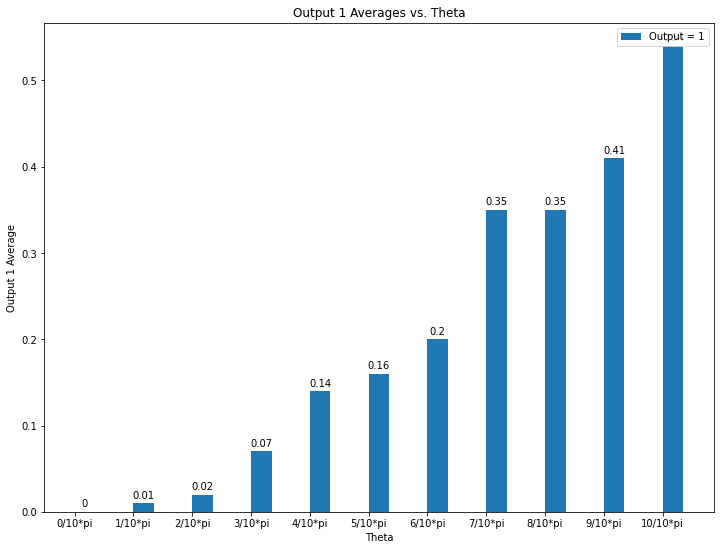

In [127]:
counts_arr = [ [] for i in range(len(thetas)) ]
for i, theta in enumerate(thetas):    

    # Define operator in exponent
    op = X + Y + Z

    # Define coefficient in exponent
    c = (theta/4)/2*((1/3)**(1/2))

    # Create HamiltonianGate, which is defined as exp(-i*op*c)
    V_gate = HamiltonianGate(op, c)

    # Define circuit
    qc = QuantumCircuit(1,1)
    qc.append(V_gate, [0])
    qc.x(0)
    qc.append(V_gate, [0])
    qc.x(0)
    qc.append(V_gate, [0])
    qc.x(0)
    qc.append(V_gate, [0])
    qc.x(0)
    qc.measure(0,0)

    # Draw circuit once
    if i==0:
        qc.draw('mpl')
        pyplot.show()

    # Simulate circuit using Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc)
    
    # collect counts of simulation output
    counts_arr[i].append( counts['0'] if '0' in counts else 0 )
    counts_arr[i].append( counts['1'] if '1' in counts else 0 )
    
    print(f'theta={i}/10*pi\tcounts: {counts}\tavg: {counts_arr[i][1]/shots:.2f}%')
    
plot_results(counts_arr)

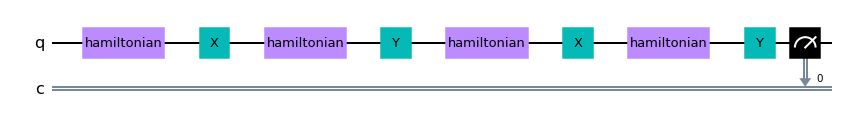

theta=0/10*pi	counts: {'0': 100}	avg: 0.00%
theta=1/10*pi	counts: {'0': 100}	avg: 0.00%
theta=2/10*pi	counts: {'0': 100}	avg: 0.00%
theta=3/10*pi	counts: {'0': 100}	avg: 0.00%
theta=4/10*pi	counts: {'0': 100}	avg: 0.00%
theta=5/10*pi	counts: {'0': 100}	avg: 0.00%
theta=6/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=7/10*pi	counts: {'0': 100}	avg: 0.00%
theta=8/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=9/10*pi	counts: {'1': 1, '0': 99}	avg: 0.01%
theta=10/10*pi	counts: {'0': 100}	avg: 0.00%


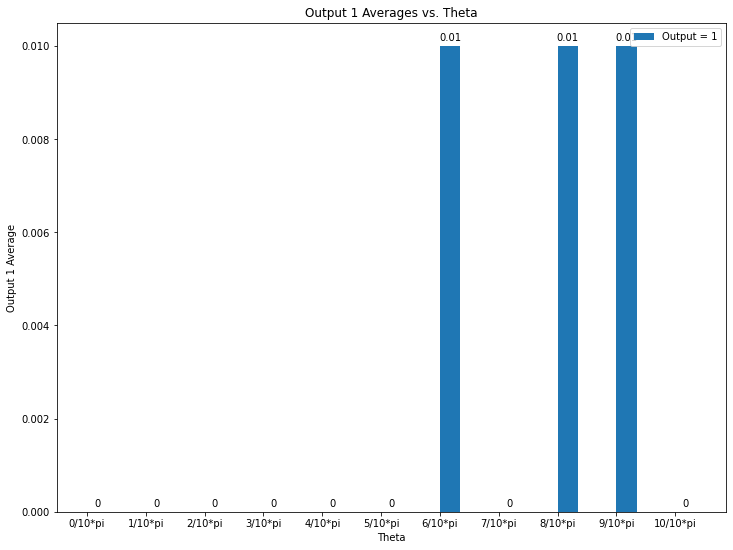

In [128]:
counts_arr = [ [] for i in range(len(thetas)) ]
for i, theta in enumerate(thetas):    

    # Define operator in exponent
    op = X + Y + Z

    # Define coefficient in exponent
    c = (theta/4)/2*((1/3)**(1/2))

    # Create HamiltonianGate, which is defined as exp(-i*op*c)
    V_gate = HamiltonianGate(op, c)

    # Define circuit
    qc = QuantumCircuit(1,1)
    qc.append(V_gate, [0])
    qc.x(0)
    qc.append(V_gate, [0])
    qc.y(0)
    qc.append(V_gate, [0])
    qc.x(0)
    qc.append(V_gate, [0])
    qc.y(0)
    qc.measure(0,0)

    # Draw circuit once
    if i==0:
        qc.draw('mpl')
        pyplot.show()

    # Simulate circuit using Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc)
    
    # collect counts of simulation output
    counts_arr[i].append( counts['0'] if '0' in counts else 0 )
    counts_arr[i].append( counts['1'] if '1' in counts else 0 )
    
    print(f'theta={i}/10*pi\tcounts: {counts}\tavg: {counts_arr[i][1]/shots:.2f}%')
    
plot_results(counts_arr)

The output of the circuit in part a changes drastically as theta goes from 0 -> pi. The output of the circuit in part b does not change very drastically as theta changes, mostly staying at 0 with certainty until theta reaches values close to pi. This indicates that the second circuit is more effective at reducing the decoherence of the qubit as the circuit progresses, and therefore is a better dynamic decoupling solution.